<ipython-input-1-307ed3b8c8bc>:38: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  moon.set_data(X1[i],Y1[i])


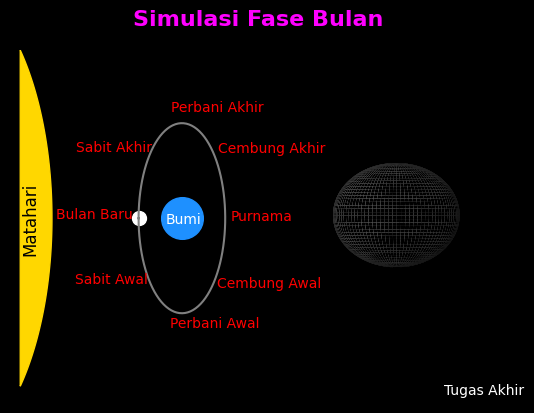

In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

r, n = 2, 200
fig = plt.figure()
ax = plt.axes(xlim=(-1, 1), ylim=(-1,1))
ax1 = fig.add_subplot(122, projection='3d')
t = np.linspace(0, 2*np.pi, n)
ax2 = fig.add_subplot(121)
w1 = np.linspace(np.pi, 3*np.pi, n)
w2 = np.linspace(-np.pi/4, np.pi/4, n)
X1 = -1 + 2*np.cos(w1)
Y1 = 2*np.sin(w1)
X2 = -12 + 5*np.cos(w2)
Y2 = 5*np.sin(w2)
moon, = ax2.plot(X1[0],Y1[0],marker="o",mfc="w",mec="w",ms=10)


def update(i):
    theta_1 = np.linspace(0, np.pi, n)
    phi_1 = np.linspace(-(np.pi/2)-t[i], (np.pi/2)-t[i], n)
    theta_1, phi_1 = np.meshgrid(theta_1, phi_1)
    x1 = r*np.sin(theta_1)*np.cos(phi_1)
    y1 = r*np.sin(theta_1)*np.sin(phi_1)
    z1 = r*np.cos(theta_1)
    theta_2 = np.linspace(0, np.pi, n)
    phi_2 = np.linspace((np.pi/2)-t[i], (3*np.pi/2)-t[i], n)
    theta_2, phi_2 = np.meshgrid(theta_2, phi_2)
    x2 = r*np.sin(theta_2)*np.cos(phi_2)
    y2 = r*np.sin(theta_2)*np.sin(phi_2)
    z2 = r*np.cos(theta_2)
    ax1.clear()
    new_moon = ax1.plot_surface(x1, y1, z1, color='k')
    full_moon = ax1.plot_surface(x2, y2, z2, color='w')
    ax1.axis(False)
    ax1.view_init(elev=0,azim=0)
    moon.set_data(X1[i],Y1[i])
    return new_moon, full_moon, moon,

anime = animation.FuncAnimation(fig, update, frames=n, interval=1, blit=False, repeat=True)
ax2.plot(X1,Y1,color="gray")
ax2.fill(X2,Y2,fc="gold",ec="gold")
ax2.plot(-1,0, marker="o", mfc="dodgerblue", mec="dodgerblue", ms=30)
ax.axis(False)
ax2.axis(False)
ax.annotate("Tugas Akhir", (0.75,-0.95),color="white")
ax2.annotate("Bulan Baru",(X1[0]-3.8,Y1[0]),color="r")
ax2.annotate("Sabit Awal",(X1[24]-3.5,Y1[24]),color="r")
ax2.annotate("Perbani Awal",(X1[49]-0.5,Y1[49]-0.30),color="r")
ax2.annotate("Cembung Awal",(X1[74]+0.25,Y1[74]),color="r")
ax2.annotate("Purnama",(X1[99]+0.25,Y1[99]),color="r")
ax2.annotate("Cembung Akhir",(X1[124]+0.25,Y1[124]),color="r")
ax2.annotate("Perbani Akhir",(X1[149]-0.5,Y1[149]+0.25),color="r")
ax2.annotate("Sabit Akhir",(X1[174]-3.5,Y1[174]),color="r")
ax2.annotate("Matahari",(-8,0),color="k", size=12, rotation=90, ha='center', va='center')
ax2.annotate("Bumi",(-1.75,-0.1),color="white")
ax.set_title("Simulasi Fase Bulan", color="fuchsia", size=16, fontweight="bold")
ax1.set_facecolor("k")
fig.patch.set_facecolor("k")
anime.save("fasebulan_TA.gif")
plt.show()
